# Machine Learning

### Textbook is available at: [https://www.github.com/a-mhamdi/isetbz](https://www.github.com/a-mhamdi/isetbz)

---


### Binary Classification using ANN

**Importing the libraries**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.set_printoptions(precision=2)

**Importing the dataset**


In [3]:
df = pd.read_csv("Datasets/Churn_Modelling.csv")

In [4]:
df = df.dropna(how="any", axis=0) 

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [11]:
X[:, 2] = le.fit_transform(X[:, 2])

In [12]:
from sklearn.compose import ColumnTransformer

In [13]:
ct = ColumnTransformer([("ohe", ohe, [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [14]:
X[:5, :]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [15]:
X = np.asarray(X, dtype=np.float64)

In [16]:
X[:5, :]

array([[1.00e+00, 0.00e+00, 0.00e+00, 6.19e+02, 0.00e+00, 4.20e+01,
        2.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.01e+05],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.08e+02, 0.00e+00, 4.10e+01,
        1.00e+00, 8.38e+04, 1.00e+00, 0.00e+00, 1.00e+00, 1.13e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.02e+02, 0.00e+00, 4.20e+01,
        8.00e+00, 1.60e+05, 3.00e+00, 1.00e+00, 0.00e+00, 1.14e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 6.99e+02, 0.00e+00, 3.90e+01,
        1.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 9.38e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.50e+02, 0.00e+00, 4.30e+01,
        2.00e+00, 1.26e+05, 1.00e+00, 1.00e+00, 1.00e+00, 7.91e+04]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=123)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
sc = MinMaxScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
print(X_train[:5, :])

[[1.   0.   0.   0.75 1.   0.16 1.   0.   0.33 1.   1.   0.27]
 [1.   0.   0.   0.51 0.   0.28 1.   0.   0.67 1.   0.   0.66]
 [0.   0.   1.   0.87 1.   0.23 0.3  0.   0.33 0.   0.   0.41]
 [1.   0.   0.   0.69 1.   0.3  0.9  0.   0.33 1.   0.   0.2 ]
 [1.   0.   0.   0.71 1.   0.2  0.3  0.58 0.33 1.   0.   0.57]]


**Build the classifier `clf`**

In [23]:
from keras.models import Sequential
from keras.layers import Dense

2022-11-15 01:01:59.752826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 01:01:59.910449: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 01:01:59.910469: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-15 01:01:59.941812: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 01:02:00.613321: W tensorflow/stream_executor/platform/de

In [24]:
clf = Sequential()
ndim = X_train.shape[1]
clf.add(Dense(units=8, activation="relu", input_dim=ndim))
clf.add(Dense(units=4, activation="relu"))
clf.add(Dense(units=4, activation="relu"))
clf.add(Dense(units=1, activation="sigmoid"))

2022-11-15 01:02:01.111603: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-15 01:02:01.111645: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 01:02:01.111668: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-11-15 01:02:01.111928: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Insights about `clf`**

In [25]:
clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


**Compile `clf`**

In [26]:
clf.compile(optimizer="adam", 
            loss="binary_crossentropy", 
            metrics=["accuracy"])

**Train `clf`**

In [27]:
clf.fit(X_train, y_train, batch_size=16, epochs=32);

Epoch 1/32
500/500 [==============================] - 1s 926us/step - loss: 0.5136 - accuracy: 0.7703
Epoch 2/32
500/500 [==============================] - 0s 944us/step - loss: 0.4672 - accuracy: 0.7972
Epoch 3/32
500/500 [==============================] - 0s 932us/step - loss: 0.4536 - accuracy: 0.8027
Epoch 4/32
500/500 [==============================] - 0s 885us/step - loss: 0.4414 - accuracy: 0.8119
Epoch 5/32
500/500 [==============================] - 0s 996us/step - loss: 0.4291 - accuracy: 0.8167
Epoch 6/32
500/500 [==============================] - 1s 1ms/step - loss: 0.4194 - accuracy: 0.8192
Epoch 7/32
500/500 [==============================] - 1s 1ms/step - loss: 0.4046 - accuracy: 0.8273
Epoch 8/32
500/500 [==============================] - 1s 1ms/step - loss: 0.3885 - accuracy: 0.8322
Epoch 9/32
500/500 [==============================] - 1s 1ms/step - loss: 0.3762 - accuracy: 0.8378
Epoch 10/32
500/500 [==============================] - 1s 1ms/step - loss: 0.3698 - accura

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [29]:
y_pred = clf.predict(X_test)
y_pred = ( y_pred > .5 ).astype(int)

63/63 [==============================] - 0s 670us/step


Print the confusion matrix

In [30]:
cm = confusion_matrix(y_test, y_pred)

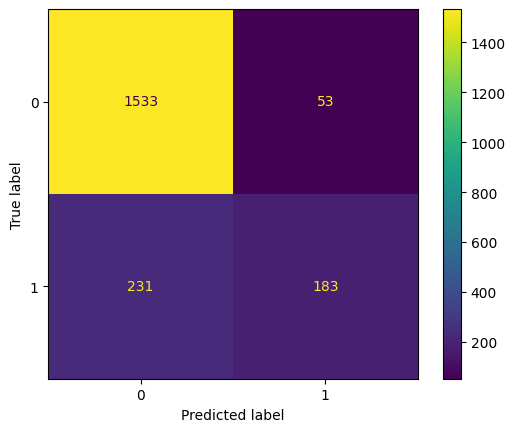

In [31]:
ConfusionMatrixDisplay(cm).plot();

In [32]:
print(y_test.shape)

(2000,)


In [33]:
print(y_pred.shape)
y_pred = y_pred.reshape(len(y_pred),)
print(y_pred.shape)

(2000, 1)
(2000,)


In [34]:
pd.crosstab(y_test, y_pred, rownames=["Expected"], colnames=["Predicted"], margins=True)

Predicted,0,1,All
Expected,,,
0,1533,53,1586
1,231,183,414
All,1764,236,2000


In [35]:
y_test = y_test.reshape(len(y_test), 1)
y_pred = y_pred.reshape(len(y_pred), 1)
print(np.concatenate((y_test[:10], y_pred[:10]), axis=1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]]


In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1586
           1       0.78      0.44      0.56       414

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

